In [22]:
import squidpy as sq
import scanpy as sc
from spatial_sample_aggregation.tl import aggregate_by_node

#### Load data

In [4]:
DATA_DIR="../data/mibitof_breast_cancer.h5ad"

In [5]:
adata = sc.read_h5ad(DATA_DIR)
adata.obs_names_make_unique()

/Users/mayar.ali/opt/anaconda3/envs/owkin-multi-sample-comp/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/mayar.ali/opt/anaconda3/envs/owkin-multi-sample-comp/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
adata

AnnData object with n_obs × n_vars = 69672 × 59
    obs: 'event', 'Point_Num', 'CohortNumber', 'Tissue_Type', 'Status', 'Tissue', 'sublineage', 'phenotype', 'compartment', 'celllineage', 'sublineage_code', 'phenotype_code', 'compartment_code', 'celllineage_code', 'manual_gating_cellineage', 'manual_gating_subineage', 'manual_gating_phenotype', 'innerduct_mask', 'distal_mask', 'stroma_mask', 'periph_mask', 'epi_mask', 'duct_mask', 'myoep_mask', 'ERstatus', 'HER2status', 'ARstatus', 'Ki67status', 'pS6status', 'GLUT1status', 'HIF1astatus', 'COX2status', 'CD36status', 'CD44status', 'PD1status', 'PDL1status', 'IDO1status', 'GZMBstatus', 'ECADstatus', 'MMP9status', 'VIMstatus', 'FAPstatus', 'HLADRstatus', 'CD3status', 'SMAstatus', 'COLIstatus', 'CK5status', 'CK7status', 'P63status', 'myoep_dist_label', 'myoep_dist_MinDist', 'myoep_dist_MaxDist', 'myoep_dist_MedDist', 'myoep_dist_MeanDist', 'celltype_code', 'myoep_dist_MinDist1', 'Neighbor_dist_TUMOR', 'Neighbor_dist_MYOEP', 'Neighbor_dist_FI

In [7]:
adata.obs.columns

Index(['event', 'Point_Num', 'CohortNumber', 'Tissue_Type', 'Status', 'Tissue',
       'sublineage', 'phenotype', 'compartment', 'celllineage',
       'sublineage_code', 'phenotype_code', 'compartment_code',
       'celllineage_code', 'manual_gating_cellineage',
       'manual_gating_subineage', 'manual_gating_phenotype', 'innerduct_mask',
       'distal_mask', 'stroma_mask', 'periph_mask', 'epi_mask', 'duct_mask',
       'myoep_mask', 'ERstatus', 'HER2status', 'ARstatus', 'Ki67status',
       'pS6status', 'GLUT1status', 'HIF1astatus', 'COX2status', 'CD36status',
       'CD44status', 'PD1status', 'PDL1status', 'IDO1status', 'GZMBstatus',
       'ECADstatus', 'MMP9status', 'VIMstatus', 'FAPstatus', 'HLADRstatus',
       'CD3status', 'SMAstatus', 'COLIstatus', 'CK5status', 'CK7status',
       'P63status', 'myoep_dist_label', 'myoep_dist_MinDist',
       'myoep_dist_MaxDist', 'myoep_dist_MedDist', 'myoep_dist_MeanDist',
       'celltype_code', 'myoep_dist_MinDist1', 'Neighbor_dist_TUMOR',

#### Compute spatial graphs

In [11]:
sq.gr.spatial_neighbors(
    adata, 
    delaunay=True, 
    radius=(0,25), 
    coord_type='generic', 
    library_key="Point_Num", 
    key_added='spatial'
)

#### Run node aggregation metrics

**1. Degree**


In [13]:
aggregate_by_node(
    adata,
    library_key="Point_Num",
    cluster_key="celllineage",
    metric="degree",
    aggregation=None,
    connectivity_key="spatial_connectivities",
    key_added="degree"
)

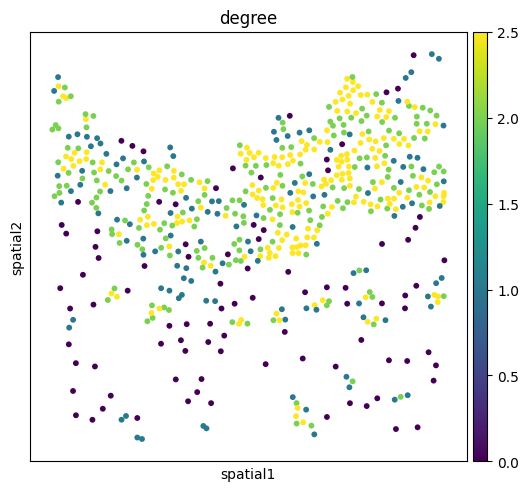

In [14]:
sq.pl.spatial_scatter(
    adata, 
    color="degree", cmap="viridis", library_key="Point_Num", library_id="2203", img=False, vmax=2.5)

**2. Shannon**

In [18]:
aggregate_by_node(adata,
                  library_key="Point_Num",
                  cluster_key="celllineage",
                  metric="shannon",
                  aggregation='mean',
                  connectivity_key="spatial_connectivities",
                  key_added="shannon"
                  )

/Users/mayar.ali/Documents/phd/hackathons/owkin-scverse-2025/feature_extraction/forked/spatial-sample-aggregation/src/spatial_sample_aggregation/tl/compute_node_features.py:123: RuntimeWarning: invalid value encountered in divide
  probabilities = neighbor_counts / neighbor_counts.sum(axis=1, keepdims=True)
/Users/mayar.ali/Documents/phd/hackathons/owkin-scverse-2025/feature_extraction/forked/spatial-sample-aggregation/src/spatial_sample_aggregation/tl/compute_node_features.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby([library_key, cluster_key])[node_feature_key]


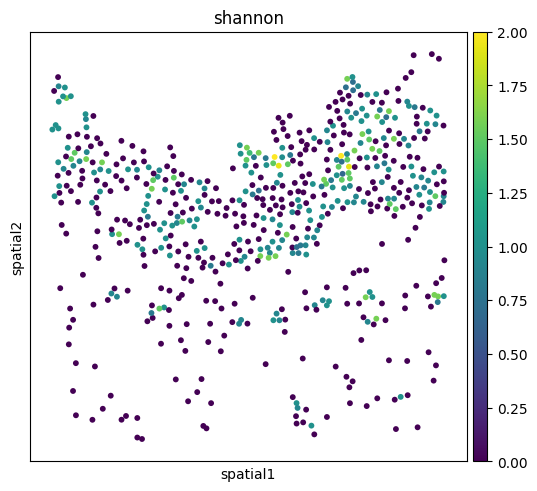

In [19]:
sq.pl.spatial_scatter(adata, color="shannon", cmap="viridis", library_key="Point_Num", library_id="2203", img=False)

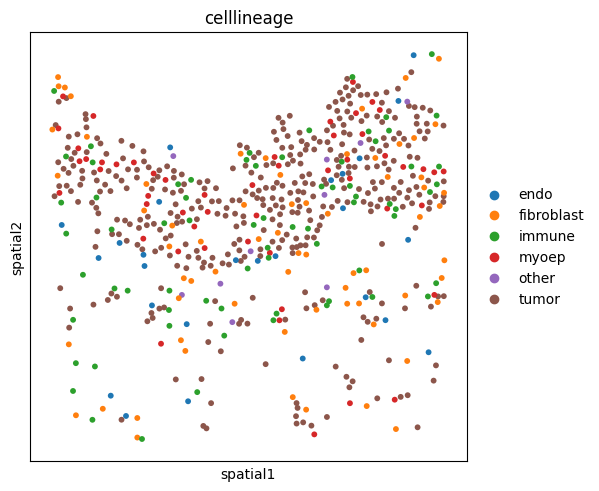

In [23]:
sq.pl.spatial_scatter(adata, color="celllineage", cmap="viridis", library_key="Point_Num", library_id="2203", img=False)

In [24]:
adata

AnnData object with n_obs × n_vars = 69672 × 59
    obs: 'event', 'Point_Num', 'CohortNumber', 'Tissue_Type', 'Status', 'Tissue', 'sublineage', 'phenotype', 'compartment', 'celllineage', 'sublineage_code', 'phenotype_code', 'compartment_code', 'celllineage_code', 'manual_gating_cellineage', 'manual_gating_subineage', 'manual_gating_phenotype', 'innerduct_mask', 'distal_mask', 'stroma_mask', 'periph_mask', 'epi_mask', 'duct_mask', 'myoep_mask', 'ERstatus', 'HER2status', 'ARstatus', 'Ki67status', 'pS6status', 'GLUT1status', 'HIF1astatus', 'COX2status', 'CD36status', 'CD44status', 'PD1status', 'PDL1status', 'IDO1status', 'GZMBstatus', 'ECADstatus', 'MMP9status', 'VIMstatus', 'FAPstatus', 'HLADRstatus', 'CD3status', 'SMAstatus', 'COLIstatus', 'CK5status', 'CK7status', 'P63status', 'myoep_dist_label', 'myoep_dist_MinDist', 'myoep_dist_MaxDist', 'myoep_dist_MedDist', 'myoep_dist_MeanDist', 'celltype_code', 'myoep_dist_MinDist1', 'Neighbor_dist_TUMOR', 'Neighbor_dist_MYOEP', 'Neighbor_dist_FI

**Visualisation**

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

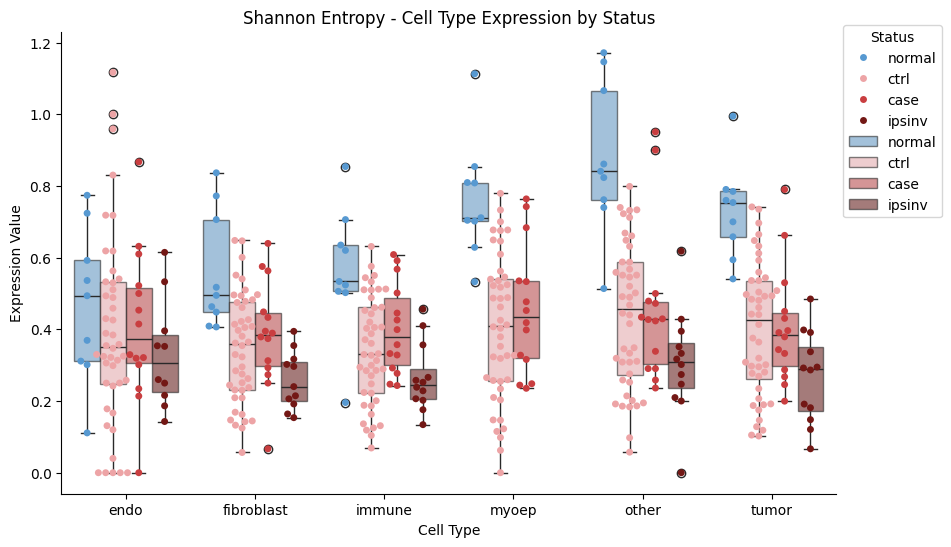

In [61]:
df = adata.uns["shannon"]
status_mapping = {row['Point_Num']: row['Status'] for i, row in adata.obs[['Status', 'Point_Num']].iterrows()}
df['Status'] = [status_mapping[x] for x in df.index.values]

# Melt the dataframe
df_melted = df.melt(id_vars=["Status"], 
                     value_vars=["endo", "fibroblast", "immune", "myoep", "other", "tumor"], 
                     var_name="celltype", 
                     value_name="value")

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_melted, x="celltype", y="value", hue="Status", hue_order=hue_order, palette=custom_palette, dodge=True)
custom_palette = {"case": "#C93E40", "ctrl": "#EDA4A6", "normal": "#5799D1", "ipsinv": "#731815"}  
hue_order = ["normal", "ctrl", "case", "ipsinv"]
sns.boxplot(data=df_melted, x="celltype", y="value", hue="Status", hue_order=hue_order, palette=custom_palette, boxprops=dict(alpha=0.6))



# Customize plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Cell Type")
plt.ylabel("Expression Value")
plt.title("Shannon Entropy - Cell Type Expression by Status")

plt.legend(title="Status", bbox_to_anchor=(1,1.03))
sns.despine()
plt.show()

In [62]:
df

celllineage,endo,fibroblast,immune,myoep,other,tumor,Status
Point_Num,,,,,,,
2203,0.178124,0.237587,0.402740,0.524605,0.183659,0.483952,ctrl
2204,0.488739,0.414112,0.420189,0.649373,0.551169,0.559363,ctrl
2206,0.347080,0.495964,0.460698,0.462429,0.587483,0.497237,ctrl
2302,1.000000,0.124645,0.223856,0.265300,0.185708,0.206648,ctrl
2303,0.718450,0.600826,0.532830,0.732828,0.660702,0.735093,ctrl
...,...,...,...,...,...,...,...
6201,0.213839,0.293084,0.277247,0.244350,0.429300,0.245850,case
6202,0.319489,0.378804,0.357208,0.398329,0.290398,0.199665,case
6203,0.321282,0.389508,0.425986,0.533257,0.258614,0.332824,case


In [64]:
df_melted

,Status,celltype,value
0,ctrl,endo,0.178124
1,ctrl,endo,0.488739
2,ctrl,endo,0.347080
3,ctrl,endo,1.000000
4,ctrl,endo,0.718450
...,...,...,...
469,case,tumor,0.245850
470,case,tumor,0.199665
471,case,tumor,0.332824
472,case,tumor,0.530046


In [71]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [69]:
p_values = {}
df = df.T
for cell_type in df_melted["celltype"].unique():
    case_values = df_melted[(df_melted["celltype"] == cell_type) & (df_melted["Status"] == "case")]["value"]
    ctrl_values = df_melted[(df_melted["celltype"] == cell_type) & (df_melted["Status"] == "ctrl")]["value"]
    normal_values = df_melted[(df_melted["celltype"] == cell_type) & (df_melted["Status"] == "normal")]["value"]
    inv_values = df_melted[(df_melted["celltype"] == cell_type) & (df_melted["Status"] == "ipsinv")]["value"]

    # Perform t-test
    if len(case_values) > 1 and len(ctrl_values) > 1:
        t_stat, p_val = stats.ttest_ind(case_values, ctrl_values, equal_var=False) 
        p_values[cell_type] = p_val
    else:
        p_values[cell_type] = np.nan 

p_values_df = pd.DataFrame(list(p_values.items()), columns=["celltype", "p-value"])
p_values_df["significance"] = p_values_df["p-value"].apply(lambda x: "***" if x < 0.001 else "**" if x < 0.01 else "*" if x < 0.05 else "ns")

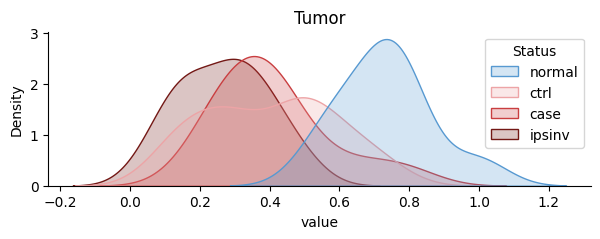

In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 2))
df_ct = df_melted[df_melted["celltype"] == "tumor"]

ax = sns.kdeplot(data=df_ct, x="value", hue="Status", hue_order = hue_order, common_norm=False, fill=True, palette=custom_palette)

plt.title("Tumor")
plt.xlabel("value")
plt.ylabel("Density")

# Explicitly call legend from `ax`
# ax.legend(title="Status", bbox_to_anchor=(1, 1), loc="upper left")

sns.despine()
plt.show()


In [88]:
from sklearn.metrics import pairwise_distances, r2_score
from sklearn.metrics.pairwise import rbf_kernel
from scipy.stats import ttest_ind

In [93]:
### The following functions are copied from CellFlow (https://github.com/theislab/CellFlow)

def compute_r_squared(x, y) -> float:
    """Compute the R squared between true (x) and predicted (y)"""
    return r2_score(np.mean(x, axis=0), np.mean(y, axis=0))


def compute_sinkhorn_div(x, y, epsilon: float = 1e-2) -> float:
    """Compute the Sinkhorn divergence between x and y."""
    return float(
        sinkhorn_divergence(
            pointcloud.PointCloud,
            x=x,
            y=y,
            cost_fn=costs.SqEuclidean(),
            epsilon=epsilon,
            scale_cost=1.0,
        ).divergence
    )


def compute_e_distance(x, y) -> float:
    """Compute the energy distance as in Peidli et al."""
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    sigma_X = pairwise_distances(x, x, metric="sqeuclidean").mean()
    sigma_Y = pairwise_distances(y, y, metric="sqeuclidean").mean()
    delta = pairwise_distances(x, y, metric="sqeuclidean").mean()
    return 2 * delta - sigma_X - sigma_Y


def pairwise_squeuclidean(x, y):
    """Compute pairwise squared euclidean distances."""
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return ((x[:, None, :] - y[None, :, :]) ** 2).sum(-1)

def compute_scalar_mmd(x, y, gammas: float | None = None) -> float:
    """Compute MMD across different length scales"""
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    if gammas is None:
        gammas = [2, 1, 0.5, 0.1, 0.01, 0.005]
    mmds = [maximum_mean_discrepancy(x, y, gamma=gamma) for gamma in gammas]  # type: ignore[union-attr]
    return np.nanmean(np.array(mmds))

def maximum_mean_discrepancy(x, y, gamma: float = 1.0, exact: bool = True) -> float:
    """Compute the Maximum Mean Discrepancy (MMD) between two samples: x and y.

    Args:
        x: a tensor of shape [num_samples, num_features]
        y: a tensor of shape [num_samples, num_features]
        exact: a bool

    Returns
    -------
        a scalar denoting the squared maximum mean discrepancy loss.
    """
    kernel = rbf_kernel if exact else rbf_kernel_fast
    xx = kernel(x, x, gamma)
    xy = kernel(x, y, gamma)
    yy = kernel(y, y, gamma)
    return xx.mean() + yy.mean() - 2 * xy.mean()
    
def compute_pvals(x, y) -> float:
    """Compute the pvals between two samples: x and y.

    Args:
        x: a tensor of shape [num_samples, num_features]
        y: a tensor of shape [num_samples, num_features]

    Returns
    -------
        a scalar denoting pvalue.
    """
    return ttest_ind(x, y)[1]
    
def compute_metrics(x, y) -> dict[str, float]:
    """Compute different metrics for x (true) and y (predicted)."""
    metrics = {}
    # metrics["r_squared"] = compute_r_squared(x, y) 
    # metrics["sinkhorn_div_1"] = compute_sinkhorn_div(x, y, epsilon=1.0)
    # metrics["sinkhorn_div_10"] = compute_sinkhorn_div(x, y, epsilon=10.0)
    # metrics["sinkhorn_div_100"] = compute_sinkhorn_div(x, y, epsilon=100.0)
    metrics["pvalue"] = compute_pvals(x, y)
    metrics["e_distance"] = compute_e_distance(x, y)
    metrics["mmd"] = compute_scalar_mmd(x, y)
    
    return metrics

In [95]:
cell_types = df_melted["celltype"].unique()
metrics_per_cell_type = []

for cell_type in cell_types:
    # Extract values for the given cell type
    case_values = df_melted[(df_melted["Status"] == "case") & (df_melted["celltype"] == cell_type)]["value"].dropna().to_numpy()
    control_values = df_melted[(df_melted["Status"] == "ctrl") & (df_melted["celltype"] == cell_type)]["value"].dropna().to_numpy()
    normal_values = df_melted[(df_melted["Status"] == "normal") & (df_melted["celltype"] == cell_type)]["value"].dropna().to_numpy()
    inv_values = df_melted[(df_melted["Status"] == "ipsinv") & (df_melted["celltype"] == cell_type)]["value"].dropna().to_numpy()

    # Ensure we have enough samples to compare
    if len(case_values) > 1 and len(control_values) > 1:
        metrics_case_vs_ctrl = compute_metrics(case_values, control_values)
        metrics_case_vs_ctrl["Comparison"] = "Case vs. Control"
        metrics_case_vs_ctrl["Cell Type"] = cell_type
        metrics_per_cell_type.append(metrics_case_vs_ctrl)
    
    if len(normal_values) > 1 and len(control_values) > 1:
        metrics_normal_vs_ctrl = compute_metrics(normal_values, control_values)
        metrics_normal_vs_ctrl["Comparison"] = "Normal vs. Control"
        metrics_normal_vs_ctrl["Cell Type"] = cell_type
        metrics_per_cell_type.append(metrics_normal_vs_ctrl)
        
    if len(normal_values) > 1 and len(case_values) > 1:
        metrics_normal_vs_case = compute_metrics(normal_values, case_values)
        metrics_normal_vs_case["Comparison"] = "Normal vs. Case"
        metrics_normal_vs_case["Cell Type"] = cell_type
        metrics_per_cell_type.append(metrics_normal_vs_case)

    if len(inv_values) > 1 and len(case_values) > 1:
        metrics_inv_vs_case = compute_metrics(inv_values, case_values)
        metrics_inv_vs_case["Comparison"] = "Invasive vs. Case"
        metrics_inv_vs_case["Cell Type"] = cell_type
        metrics_per_cell_type.append(metrics_inv_vs_case)

# Convert results into a DataFrame
metrics_df_cell_type = pd.DataFrame(metrics_per_cell_type)
metrics_df_cell_type

,pvalue,e_distance,mmd,Comparison,Cell Type
0,8.343651e-01,0.000550,0.001517,Case vs. Control,endo
1,4.285617e-01,0.011635,0.007530,Normal vs. Control,endo
2,5.208788e-01,0.007127,0.003553,Normal vs. Case,endo
3,3.341034e-01,0.012156,0.006332,Invasive vs. Case,endo
4,4.161030e-01,0.002889,0.001565,Case vs. Control,fibroblast
5,3.859376e-04,0.091909,0.043360,Normal vs. Control,fibroblast
6,1.436380e-02,0.062207,0.029383,Normal vs. Case,fibroblast
7,1.718079e-02,0.032505,0.018070,Invasive vs. Case,fibroblast
8,1.881911e-01,0.006839,0.003493,Case vs. Control,immune
9,2.403656e-04,0.097981,0.048318,Normal vs. Control,immune
